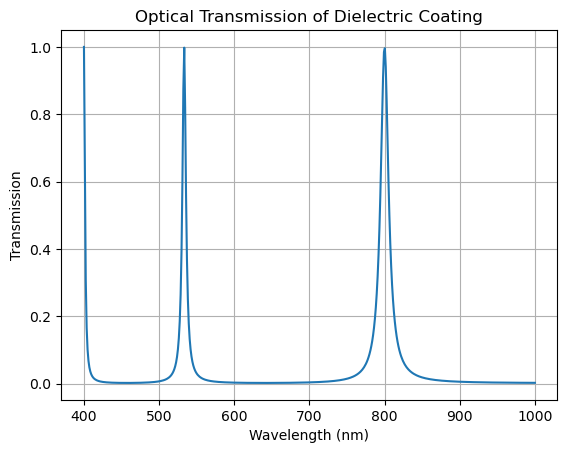

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_transmission(n_layers, d_layers, wavelengths):
    # Constants
    n0 = 1.0  # Refractive index of the incident medium (air)
    ns = 1.0  # Refractive index of the substrate


    # Calculate the transmission for each wavelength
    transmission = []
    reflection_power = []
    for wavelength in wavelengths:
        # Initialize the characteristic matrix for the entire stack
        M_total = np.array([[1, 0], [0, 1]], dtype=complex)

        # Calculate the characteristic matrix for each layer and multiply them
        for n_index, d in zip(n_layers, d_layers):

            match n_layers:
                case 0:
                      n_index = 1
                case 1:
                      n_index = 1.463 + 0.003827/(wavelength**2) + 0.000/(wavelength**4)
                        
                case 2:
                      n_index = 2.1305 + 0.018499/(wavelength**2) + 0.00199850/(wavelength**4)

                case 40:
                      n_index = 40

            delta = 2 * np.pi * n_index * d / wavelength
            M = np.array([[np.cos(delta), 1j * np.sin(delta) / n_index],
                          [1j * n_index * np.sin(delta), np.cos(delta)]])
            M_total = np.dot(M_total, M)

        # Calculate the transmission coefficient
        t = 2 * n0 / (M_total[0, 0] * n0 + M_total[0, 1] * n0*ns + M_total[1, 0] * n0 + M_total[1, 1] * ns)
        T = np.abs(t)**2
        
        transmission.append(T)

        m11 = M_total[0,0]
        m12 = M_total[0,1]
        m21 = M_total[1,0]
        m22 = M_total[1,1]

        B = m11 + m12*ns
        C = m21 + m22 * ns
        r = (n0*B - C) / (n0 * B + C)
        R_power = r * np.conj(r)

        reflection_power.append(R_power)

    return transmission,reflection_power 

# User inputs
#num_layers = int(input("Enter the number of layers: "))
#n_layers = [float(input(f"Enter the refractive index of layer {i+1}: ")) for i in range(num_layers)]
#d_layers = [float(input(f"Enter the thickness of layer {i+1} (in nm): ")) for i in range(num_layers)]

num_layers = 2
n_layers = [40,40]
d_layers = [10,10]

#num_layers = 4
#n_layers = [1.5,2,1.5,2]
#d_layers = [400,400,400,400]


# Wavelength range (in nm)
wavelengths = np.linspace(400, 1000, 500)

# Calculate transmission
transmission, reflection_power = calculate_transmission(n_layers, d_layers, wavelengths)

# Plot the results
plt.plot(wavelengths, transmission)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('Optical Transmission of Dielectric Coating')
plt.grid(True)
plt.show()


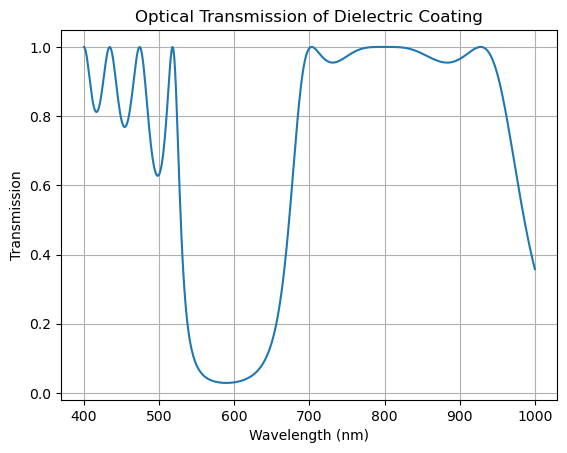

In [5]:
num_layers = 8
n_layers = [1,2,1,2,1,2,1,2]
d_layers = [200,200,200,200,200,200,200,200]


# Wavelength range (in nm)
wavelengths = np.linspace(400, 1000, 500)

# Calculate transmission
transmission, reflection_power = calculate_transmission(n_layers, d_layers, wavelengths)

# Plot the results
plt.plot(wavelengths, transmission)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('Optical Transmission of Dielectric Coating')
plt.grid(True)
plt.show()


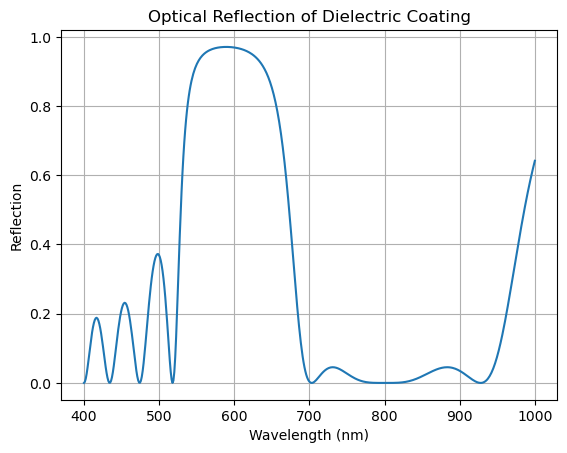

In [6]:
plt.plot(wavelengths, reflection_power)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflection')
plt.title('Optical Reflection of Dielectric Coating')
plt.grid(True)
plt.show()
